In [89]:
# import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from scipy import stats

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
#Load the csv files into pandas dataframe
Salesdata=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Add_sales_data_2018.xlsx')
#Display the dataset
Salesdata




,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [92]:
#Summary of the dataset
Salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  205 non-null    datetime64[ns]
 1   Add1(in Thousands)    205 non-null    float64       
 2   Add2(in Thousands)    205 non-null    float64       
 3   Add3(in Thousands)    205 non-null    float64       
 4   Add4(in Thousands)    205 non-null    float64       
 5   Add5(in Thousands)    205 non-null    float64       
 6   Profit(in Thousands)  205 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.3 KB


**The summary of the dataset shows that there are 205 entries and 7 features(Date,Add1 to Add5 and Profit).**


In [93]:
# Calculating the null values present in each column of the dataset
Salesdata.isna().sum() # or StudentsPerformance.isnull().sum() 

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

**No missing values are present in the dataset**




In [94]:
#Statistical description of the given dataset
Salesdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Add1(in Thousands),205.0,267.577561,26.219588,208.000,244.000,269.700,284.400,327.70
Add2(in Thousands),205.0,271.722439,25.914939,218.600,248.500,274.200,288.800,328.75
Add3(in Thousands),205.0,262.990732,26.126704,205.900,240.300,263.250,280.900,321.65
Add4(in Thousands),205.0,267.223902,26.238832,210.250,243.050,268.900,284.500,325.95
Add5(in Thousands),205.0,267.152683,26.215360,209.200,243.000,268.350,284.450,325.75
Profit(in Thousands),205.0,5059.630234,486.910414,4042.448,4617.695,5088.455,5387.438,6137.80


**This shows the complete statistical summary of the dataset.**


**Qn.1 First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit
generated.**

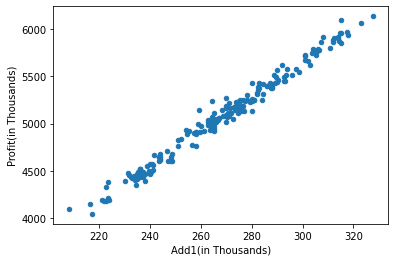

In [95]:
Salesdata.plot(kind='scatter',x='Add1(in Thousands)', y='Profit(in Thousands)')
plt.show()

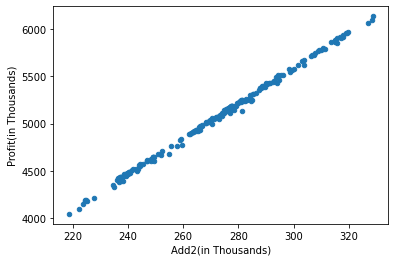

In [96]:
Salesdata.plot(kind='scatter',x='Add2(in Thousands)', y='Profit(in Thousands)')
plt.show()

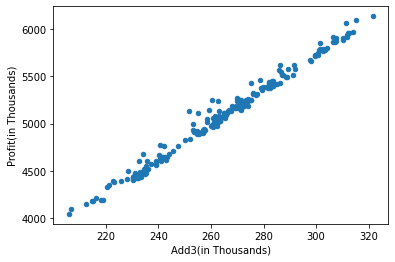

In [97]:
Salesdata.plot(kind='scatter',x='Add3(in Thousands)', y='Profit(in Thousands)')
plt.show()

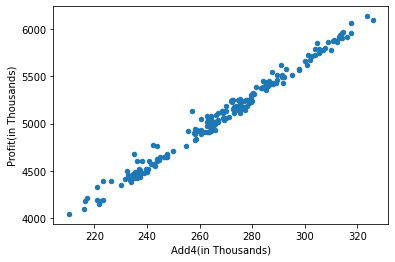

In [98]:
Salesdata.plot(kind='scatter',x='Add4(in Thousands)', y='Profit(in Thousands)')
plt.show()

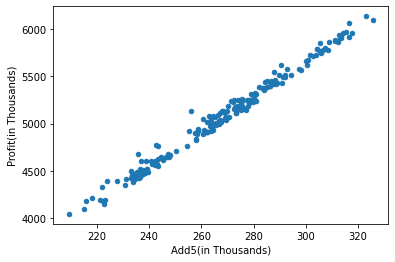

In [99]:
Salesdata.plot(kind='scatter',x='Add5(in Thousands)', y='Profit(in Thousands)')
plt.show()

**As it is clear from the above plots there is a strong positive correlation between amount spent through five different companies and profit generated and it is high for Add2. The amount spent for all other Adds also possess strong positive correlation. That means As the amount spent for adds increases profit also increases.**

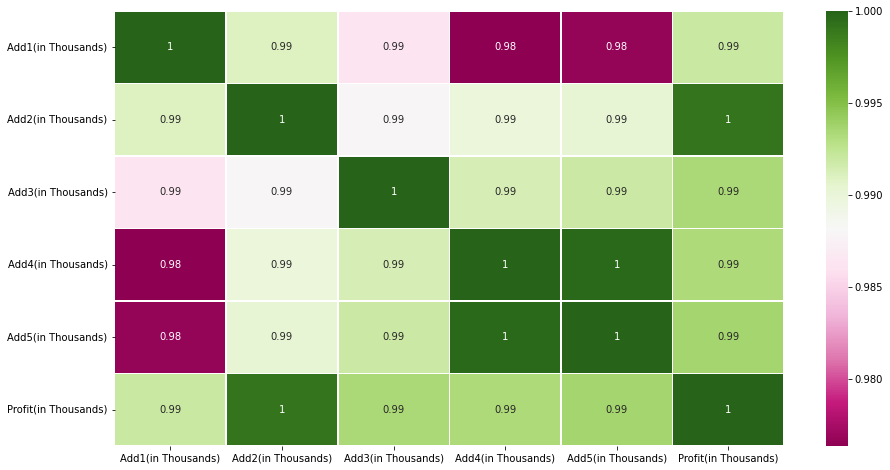

In [100]:
Corrmatrix=Salesdata.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(Corrmatrix,annot=True,linewidth=0.5,cmap='PiYG')

**By observing the correlation heatmap generated, the maximum vale of correlation is 1 and minimum is 0.99,which also indicates very high correlation between variables. The amount spent and the profits obtained is maximum for Add2 indicated by correaltion value of 1. The other adds(1,3,4 and 5) also succeed equally with a correaltion value of 0.99. Altogether, the profit will increase when the amount spent for add increases.**

**Qn.2 Build a regression model to predict the profit from the given data and comment your findings on it**

In [101]:
Salesdata.columns  

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

**Identify the features present in the columns**

In [102]:
y=Salesdata['Profit(in Thousands)']
x=Salesdata.drop(['Date','Profit(in Thousands)'],axis=1)

**This is done to split the total dataset into dependent and independent variables.The dependent variable 'profit' is stored as y and independent variables in x omitting less correlated variables using 'drop' function**

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

**Split the data into training and test set which is available in sklearn library**

In [104]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [105]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


**The actual output and predictions turned same showing very high positive correlation**

In [106]:
from sklearn.metrics import mean_squared_error
print("MSE is",mean_squared_error(y_test,predictions))

MSE is 4.1359030627651384e-25


**The mean squarred error os very very low which again indicates strong correlation between amount spent on adds and profot gained**

In [107]:
model.score(x_test,y_test)

1.0

**sklearn R-squared value is 1 showing very high correlation**

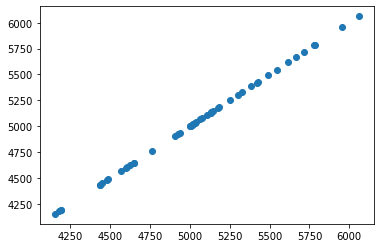

In [108]:
plt.scatter(predictions,y_test) #plot between actual and predicted output

**As we can see that the mean squarred error is very low and therefore a high 
correlation exists netween the y-test and predictions with MSE of 4.1359030627651384e-25.**

**Qn.3 Predict the profit generated by the company, if they wish to spend the
following amount for advertisement :::
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320**

In [109]:
x_new=[['290','312','309','298','320']]  # Assigning new set of input values to a variable named x_new
y_new = model.predict(x_new)             # Predicting the profit generated and assigning the value to another variable y_new
print("Profit generated by the company is:",y_new)


Profit generated by the company is: [5820.06]


**The amount predicted for the profit generated is 5820.06 for the given new dataset**